In [152]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [153]:
GlobalLandTemperaturesByCity = "/content/drive/MyDrive/Time Series Analysis/Temperature Analysis & Prediction/Data Sets/GlobalLandTemperaturesByCity.csv"
GlobalLandTemperaturesByCountry= "/content/drive/MyDrive/Time Series Analysis/Temperature Analysis & Prediction/Data Sets/GlobalLandTemperaturesByCountry.csv"
GlobalLandTemperaturesByMajorCity = "/content/drive/MyDrive/Time Series Analysis/Temperature Analysis & Prediction/Data Sets/GlobalLandTemperaturesByMajorCity.csv"
GlobalLandTemperaturesByState = "/content/drive/MyDrive/Time Series Analysis/Temperature Analysis & Prediction/Data Sets/GlobalLandTemperaturesByState.csv"
GlobalTemperatures= "/content/drive/MyDrive/Time Series Analysis/Temperature Analysis & Prediction/Data Sets/GlobalTemperatures.csv"

In [154]:
GlobalTemperaturesDf = pd.read_csv(GlobalTemperatures)
GlobalTemperaturesDf.head(10)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
5,1750-06-01,12.937,1.724,NaN,NaN,NaN,NaN,NaN,NaN
6,1750-07-01,15.868,1.911,NaN,NaN,NaN,NaN,NaN,NaN
7,1750-08-01,14.750,2.231,NaN,NaN,NaN,NaN,NaN,NaN
8,1750-09-01,11.413,2.637,NaN,NaN,NaN,NaN,NaN,NaN
9,1750-10-01,6.367,2.668,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
GlobalTemperaturesDf.tail(10)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3182,2015-03-01,6.740,0.060,12.659,0.096,0.894,0.079,15.193,0.061
3183,2015-04-01,9.313,0.088,15.224,0.137,3.402,0.147,15.962,0.061
3184,2015-05-01,12.312,0.081,18.181,0.117,6.313,0.153,16.774,0.058
3185,2015-06-01,14.505,0.068,20.364,0.133,8.627,0.168,17.390,0.057
3186,2015-07-01,15.051,0.086,20.904,0.109,9.326,0.225,17.611,0.058
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


In [156]:
GlobalTemperaturesDf.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

In [157]:
GlobalTemperaturesDf.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')

In [158]:
GlobalTemperaturesDf.shape

(3192, 9)

In [159]:
GlobalTemperaturesDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [160]:
GlobalTemperaturesDf.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [161]:
GlobalTemperaturesDf.describe(include=object)

,dt
count,3192
unique,3192
top,1923-03-01
freq,1


In [162]:
# Converting to String Object To Datetime Object
GlobalTemperaturesDf['dt'] = pd.to_datetime(GlobalTemperaturesDf.dt)

# Fetching Year, Month, Day and adding to columns
GlobalTemperaturesDf['Year'] = GlobalTemperaturesDf['dt'].apply(lambda x:x.year)
GlobalTemperaturesDf['Month'] = GlobalTemperaturesDf['dt'].apply(lambda x:x.month)
GlobalTemperaturesDf['Day'] = GlobalTemperaturesDf['dt'].apply(lambda x:x.day)


In [163]:
GlobalTemperaturesDf.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Year,Month,Day
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1,1
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2,1
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3,1
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4,1
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5,1


In [164]:
GlobalTemperaturesDf.index = GlobalTemperaturesDf.dt

In [165]:
GlobalTemperaturesDf.drop('dt',axis=1,inplace=True)

In [166]:
GlobalTemperaturesYearDf = GlobalTemperaturesDf.groupby('Year').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index()

In [167]:
GlobalTemperaturesYearDf.head(10)

,Year,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250
5,1755,8.355583,3.850333
6,1756,8.849583,3.262333
7,1757,9.022000,4.026000
8,1758,6.743583,3.362917
9,1759,7.985083,3.678917


In [168]:
GlobalTemperaturesYearDf['Unceratainity_top'] = GlobalTemperaturesYearDf['LandAverageTemperature'] + GlobalTemperaturesYearDf['LandAverageTemperatureUncertainty']
GlobalTemperaturesYearDf['Unceratainity_bottom'] = GlobalTemperaturesYearDf['LandAverageTemperature'] - GlobalTemperaturesYearDf['LandAverageTemperatureUncertainty']

In [169]:
GlobalTemperaturesYearDf.head(10)

,Year,LandAverageTemperature,LandAverageTemperatureUncertainty,Unceratainity_top,Unceratainity_bottom
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083
5,1755,8.355583,3.850333,12.205917,4.505250
6,1756,8.849583,3.262333,12.111917,5.587250
7,1757,9.022000,4.026000,13.048000,4.996000
8,1758,6.743583,3.362917,10.106500,3.380667
9,1759,7.985083,3.678917,11.664000,4.306167


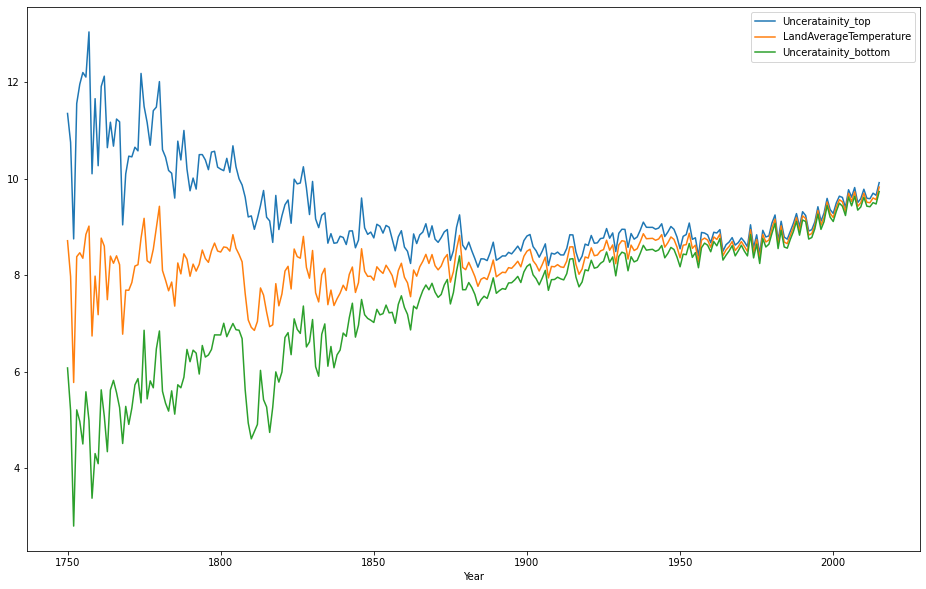

In [170]:
GlobalTemperaturesYearDf.plot(x='Year',y=['Unceratainity_top','LandAverageTemperature',
        'Unceratainity_bottom'],figsize=(16,10))

In [171]:
import plotly.graph_objs as go
fig = go.Figure()
for col in ['Unceratainity_top','LandAverageTemperature','Unceratainity_bottom']:
    fig.add_trace(go.Line(x=GlobalTemperaturesYearDf.Year, y=GlobalTemperaturesYearDf[col],name=col))
fig.show()

In [172]:
def get_season(month):
    if 3 <= month <= 5:return "Spring"
    elif  6<= month <= 8:return "Summer"
    elif  9<= month <= 11:return "Autumn"
    else: return "Winter"

GlobalTemperaturesDf['Season'] = GlobalTemperaturesDf.Month.apply(get_season)

In [173]:
temp1 = GlobalTemperaturesDf.groupby(["Year","Season"]).mean()
temp2 = pd.DataFrame(temp1)
byYear = pd.DataFrame({"Year":temp1.reset_index()['Year'].unique()})

byYear['Autumn'] = None
byYear['Spring'] = None
byYear['Summer'] = None
byYear['Winter'] = None

byYear.index = byYear.Year
byYear.drop("Year",inplace=True,axis=1)

for  year,row in zip(byYear.index,range(len(byYear))):
    for season,number in zip(byYear.columns,range(len(byYear.columns))):
        byYear.values[row][number] = temp2['LandAverageTemperature'][year][season]

byYear.reset_index(inplace=True)

fig = go.Figure()
for col in ['Summer', 'Winter', 'Spring', 'Autumn']:
    fig.add_trace(go.Line(x=byYear.Year, y=byYear[col],name=col))
fig.show()

In [174]:
GlobalTempratureByCityDf = pd.read_csv(GlobalLandTemperaturesByCity)

In [175]:
GlobalTempratureByCityDf[GlobalTempratureByCityDf['Country'] == "United States"]['City'].value_counts()

Springfield    9545
Columbus       6478
Aurora         6101
Arlington      5564
Peoria         5384
               ... 
San Diego      1977
Santa Clara    1977
Norwalk        1977
Sacramento     1977
Visalia        1977
Name: City, Length: 248, dtype: int64

In [176]:
GlobalTempratureByCityDf['dt'] = pd.to_datetime(GlobalTempratureByCityDf['dt'])

In [209]:
GlobalTempratureByCityDf.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E
9,1744-08-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [178]:
GlobalTempratureByCityDf.shape

(8599212, 7)

In [179]:

USA_TEMPRATURES =  GlobalTempratureByCityDf[GlobalTempratureByCityDf['Country'] == "United States"]

In [180]:
# USA_TEMPRATURES
usa_cities = ['New York','Los Angeles','San Francisco']
USA_CITY = USA_TEMPRATURES[USA_TEMPRATURES['City'].isin(usa_cities)]
USA_CITY = USA_CITY[['dt','AverageTemperature']]
USA_CITY.isna().sum()

dt                      0
AverageTemperature    120
dtype: int64

In [181]:
USA_CITY.dropna(inplace=True)
USA_CITY.shape

(7073, 2)

In [182]:
USA_CITY.set_index("dt",inplace=True)
USA_CITY.columns = ['Temperature']
USA_CITY.columns

Index(['Temperature'], dtype='object')

In [183]:

USA_CITY.head(10)

,Temperature
dt,
1849-01-01,8.819
1849-02-01,9.577
1849-03-01,11.814
1849-04-01,13.704
1849-05-01,14.834
1849-06-01,21.173
1849-07-01,26.159
1849-08-01,26.099
1849-09-01,21.848


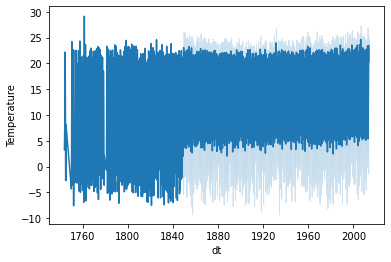

In [184]:
sns.lineplot(x=USA_CITY.index,y=USA_CITY.Temperature,)

In [185]:
# P Value Must be less than 0.05
# adfuller(USA_CITY.Temperautre)

def adfuller_test(DataSet):
    result = adfuller(DataSet)
    labels = ['ADF Test Statistics','P-Value','#lags Used','Number of Observations']

    for value,label in zip(result,labels):
        print(f"{label}-->{value}")

    if result[1]<=0.05:
        print("Strong Evidence Against Null Hypo, Reject Null Hypo, Data has no unit root and it is stationory")
    else:
        print("Weak Evidence Against Null Hypo, accept the null hypo, data has unit root and non stationary")
    

adfuller_test(USA_CITY.Temperature)

ADF Test Statistics-->-2.0063893036757956
P-Value-->0.28377865833332594
#lags Used-->35
Number of Observations-->7037
Weak Evidence Against Null Hypo, accept the null hypo, data has unit root and non stationary


In [186]:
USA_CITY_COPY = USA_CITY.copy()

In [187]:
USA_CITY_COPY['first_shift'] = USA_CITY.Temperature-USA_CITY.Temperature.shift(12)

In [188]:
adfuller_test(USA_CITY_COPY.first_shift.dropna())

ADF Test Statistics-->-21.23965040491091
P-Value-->0.0
#lags Used-->35
Number of Observations-->7025
Strong Evidence Against Null Hypo, Reject Null Hypo, Data has no unit root and it is stationory


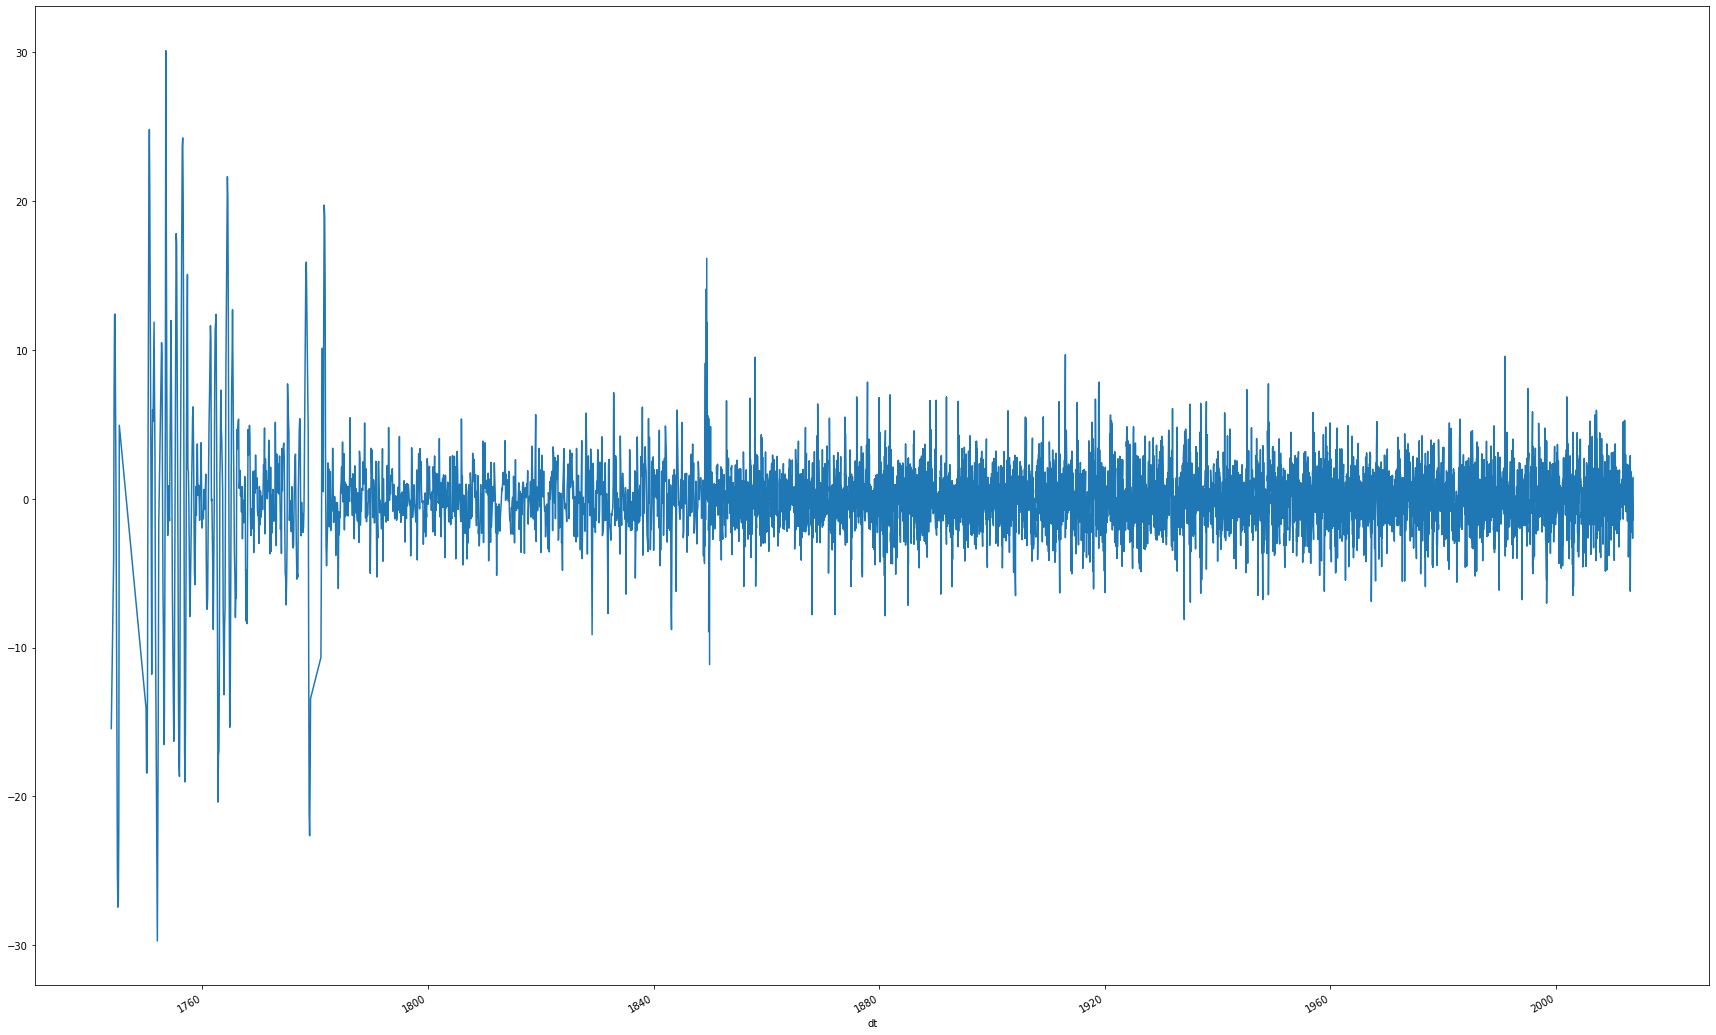

In [189]:
USA_CITY_COPY['first_shift'].plot(figsize=(30,20))

In [190]:
USA_CITY.head()

,Temperature
dt,
1849-01-01,8.819
1849-02-01,9.577
1849-03-01,11.814
1849-04-01,13.704
1849-05-01,14.834


In [191]:
USA_CITY['month'] = USA_CITY.index.month
USA_CITY['year'] = USA_CITY.index.year
USA_CITY['day'] = USA_CITY.index.day

In [192]:
USA_CITY.head(10)

,Temperature,month,year,day
dt,,,,
1849-01-01,8.819,1,1849,1
1849-02-01,9.577,2,1849,1
1849-03-01,11.814,3,1849,1
1849-04-01,13.704,4,1849,1
1849-05-01,14.834,5,1849,1
1849-06-01,21.173,6,1849,1
1849-07-01,26.159,7,1849,1
1849-08-01,26.099,8,1849,1
1849-09-01,21.848,9,1849,1


In [193]:
USA_CITY.tail(10)

,Temperature,month,year,day
dt,,,,
2012-12-01,8.950,12,2012,1
2013-01-01,8.320,1,2013,1
2013-02-01,10.229,2,2013,1
2013-03-01,13.506,3,2013,1
2013-04-01,15.996,4,2013,1
2013-05-01,17.434,5,2013,1
2013-06-01,19.759,6,2013,1
2013-07-01,20.657,7,2013,1
2013-08-01,19.731,8,2013,1


In [194]:
pivot = USA_CITY.pivot_table(values="Temperature",index="month",columns="year")
pivot.head()

year,1743,1744,1745,1750,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760,1761,1762,1763,1764,1765,1766,1767,1768,1769,1770,1771,1772,1773,1774,1775,1776,1777,1778,1779,1781,1782,1783,1784,1785,1786,1787,...,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,-2.363,-4.310,-3.591,-7.588,-3.122,-2.252,-3.193,-1.985,-4.790,-4.982,-3.350,-4.200,-6.900,NaN,-6.632,-3.228,-4.023,-4.324,-3.511,-3.644,-1.794,-4.794,-0.039,-3.740,-2.708,-6.386,-1.127,-4.406,-1.703,-2.395,-3.598,-0.665,-5.170,-5.014,-6.080,-5.126,-5.301,-3.090,...,5.127667,5.626000,4.656000,2.853000,5.315667,4.232000,6.137667,4.609333,2.471333,5.545667,5.025667,3.456333,6.919667,4.341333,4.239333,5.147667,6.616333,5.261000,5.225000,5.428667,4.193667,6.597333,5.424333,5.256000,7.141667,5.741000,5.895000,4.700000,6.146333,6.581000,4.080333,4.923000,7.135333,5.656,5.216333,5.550333,5.776667,5.109333,7.177667,5.388333
2,NaN,NaN,-2.671,-2.719,-2.051,NaN,-1.467,-2.583,-1.802,0.259,-1.507,-3.689,-0.007,-1.327,-2.162,-2.559,-4.010,0.683,-0.558,0.621,-2.073,1.139,-2.480,-1.657,-4.020,-1.898,-5.051,-1.681,1.335,-1.976,-1.677,NaN,2.204,-0.648,-3.844,-0.450,-6.486,-3.453,-2.107,-2.790,...,5.662667,6.281667,7.368333,7.452667,5.175333,3.688333,6.836000,8.354667,6.975333,7.220000,7.720333,6.714000,7.027000,6.387333,7.453000,5.177000,6.446333,8.873667,8.014000,5.216667,4.808333,7.207333,7.335333,7.907333,7.082000,6.718000,7.085667,5.958667,8.562333,5.698667,6.100000,7.297000,7.547667,5.634,6.754333,6.540667,6.788000,5.777333,7.970000,6.222667
3,NaN,NaN,1.363,2.773,3.256,3.322,4.207,2.728,1.112,NaN,2.260,1.532,2.711,1.358,3.621,0.760,0.710,2.562,3.977,2.801,2.647,0.857,2.086,0.316,2.995,-0.539,2.469,3.005,4.784,1.712,2.658,NaN,2.134,2.728,0.662,1.627,0.747,-1.343,4.104,3.155,...,9.027000,7.811000,9.111333,8.860000,9.616333,9.672667,8.304333,8.616333,7.892333,9.554000,9.205000,8.559000,10.600667,9.539333,10.487000,9.740667,9.968333,8.267667,9.111667,9.618333,9.729667,9.750667,9.155667,10.656667,9.817000,8.002667,10.464333,9.645667,9.430000,10.064000,12.184000,9.124667,7.527333,10.586,9.733667,9.211000,10.486667,9.115000,10.604333,10.162333
4,NaN,9.788,8.209,8.848,7.992,7.402,8.099,NaN,8.714,NaN,7.666,7.768,7.991,8.617,8.279,9.184,8.061,NaN,9.915,8.662,8.550,6.302,8.157,8.689,8.771,9.009,9.441,12.664,8.367,8.185,7.094,NaN,NaN,7.723,10.131,8.539,6.116,7.245,8.086,8.756,...,12.383667,9.173333,11.731000,13.274333,11.294667,12.076000,12.665333,13.318333,11.412000,11.080333,11.978667,13.967333,12.623667,14.256000,12.559667,13.814667,13.552333,12.525000,13.680667,13.064667,13.179333,11.791333,13.601333,12.861333,11.865000,11.593667,13.185000,11.586000,13.032667,10.623000,13.806333,12.546000,12.051667,12.342,13.113000,12.744000,12.254000,12.710000,13.075000,13.880000
5,NaN,15.708,NaN,15.411,NaN,NaN,15.330,NaN,15.238,NaN,15.332,13.844,14.739,14.091,18.068,15.511,13.984,NaN,15.262,15.176,13.560,13.484,13.858,14.300,16.185,13.882,16.254,NaN,17.038,NaN,13.042,13.965,NaN,14.866,15.515,15.389,14.210,13.007,14.358,13.978,...,15.614333,16.759333,16.382333,14.889000,16.615000,16.897333,15.415000,16.602333,16.372333,15.829333,17.296333,16.205333,16.896333,17.149667,16.171333,16.125667,15.613333,16.211000,17.499333,17.112667,15.531667,14.833333,16.592333,17.981000,15.105333,15.567000,17.351000,18.744667,15.693333,15.874000,17.817333,15.982333,17.123333,17.150,15.800333,17.565667,15.856333,15.724000,17.670333,17.335333


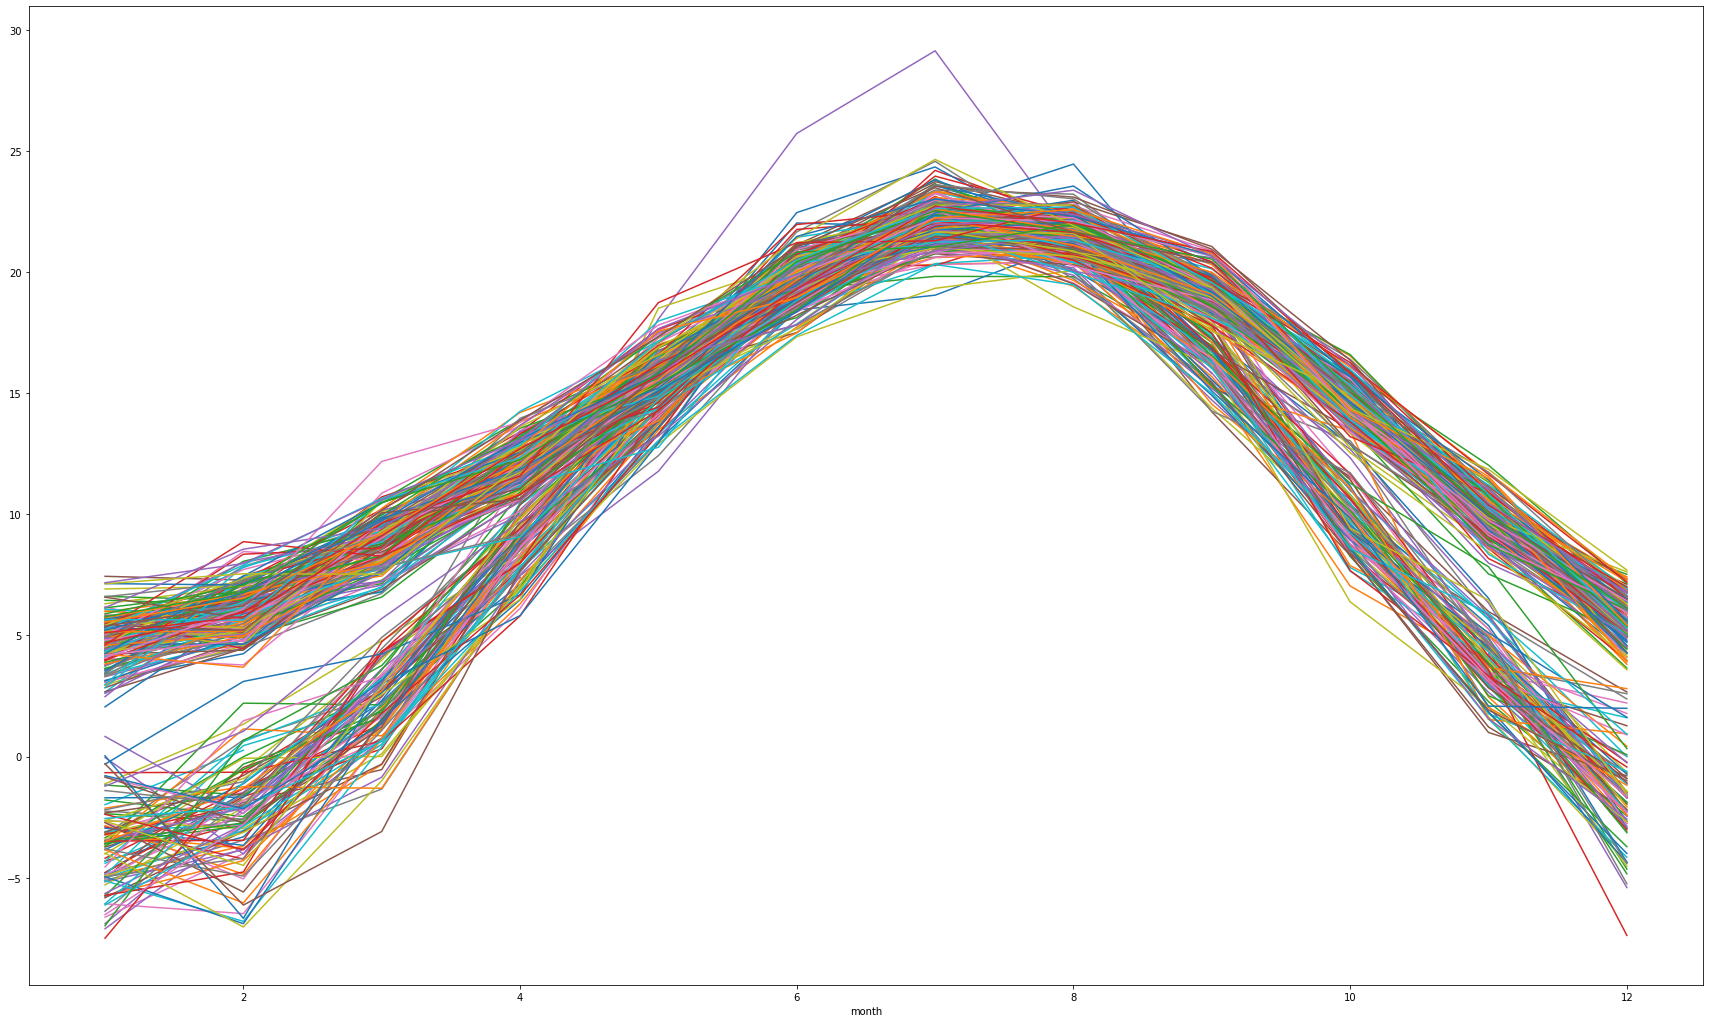

In [195]:
pivot.plot(figsize=(30,18))
plt.legend().remove()
plt.ylabel = ("Tempratures")

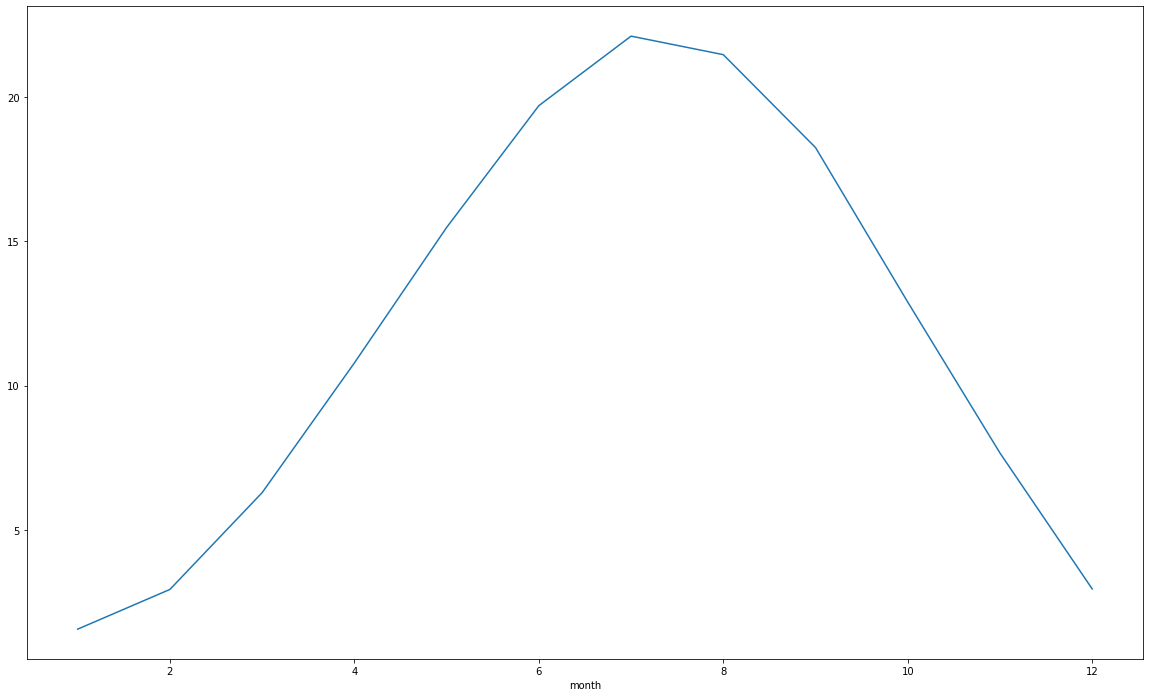

In [196]:
pivot.mean(axis=1).plot(figsize=(20,12))

In [197]:
USA_CITY_COPY

,Temperature,first_shift
dt,,
1849-01-01,8.819,NaN
1849-02-01,9.577,NaN
1849-03-01,11.814,NaN
1849-04-01,13.704,NaN
1849-05-01,14.834,NaN
...,...,...
2013-05-01,17.434,0.879
2013-06-01,19.759,1.277
2013-07-01,20.657,1.025


In [198]:
df = USA_CITY_COPY['first_shift'].dropna()

In [199]:
df.rolling(window=5).mean()

dt
1850-01-01       NaN
1850-02-01       NaN
1850-03-01       NaN
1850-04-01       NaN
1850-05-01   -0.4706
               ...  
2013-05-01    0.4336
2013-06-01    1.0236
2013-07-01    1.4060
2013-08-01    0.8454
2013-09-01    0.7614
Name: first_shift, Length: 7061, dtype: float64

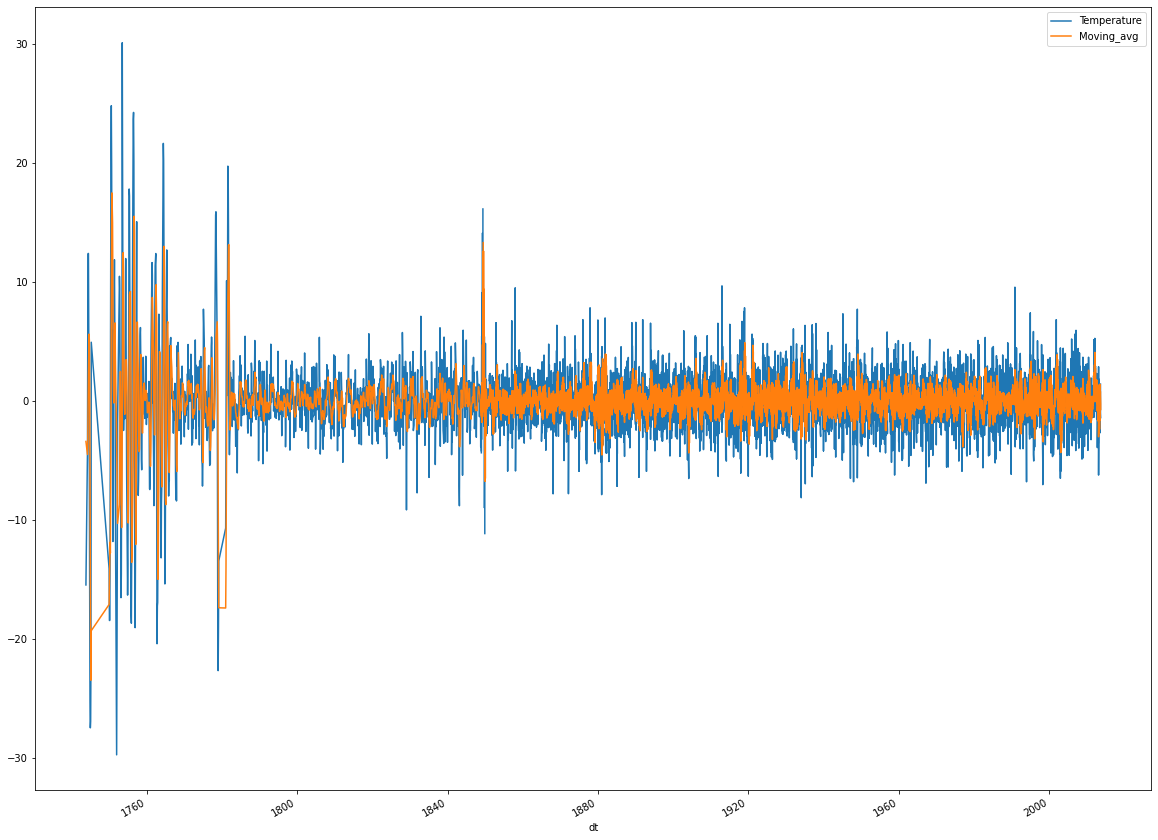

In [200]:
new_df = pd.concat([USA_CITY_COPY['first_shift'],USA_CITY_COPY['first_shift'].rolling(window=5).mean()],axis=1)
new_df.columns = ["Temperature","Moving_avg"]
new_df.plot(figsize=(20,16))

In [201]:
new_df.dropna(inplace=True)
np.sqrt(mean_squared_error(new_df.Temperature,new_df.Moving_avg))

2.3934235122562058

# Using ARIMA MODEL FOR PREDICTION

an autoregressive integrated moving average (ARIMA) model is a generalization of an autoregressive moving average (ARMA) model. Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting). ARIMA models are applied in some cases where data show evidence of non-stationarity in the sense of mean (but not variance/autocovariance), where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity of the mean function (i.e., the trend).[1] When the seasonality shows in a time series, the seasonal-differencing[2] could be applied to eliminate the seasonal component. Since the ARMA model, according to the Wold's decomposition theorem,[3][4][5] is theoretically sufficient to describe a regular (a.k.a. purely nondeterministic[5]) wide-sense stationary time series, we are motivated to make stationary a non-stationary time series, e.g., by using differencing, before we can use the ARMA model.[6] Note that if the time series contains a predictable sub-process (a.k.a. pure sine or complex-valued exponential process[4]), the predictable component is treated as a non-zero-mean but periodic (i.e., seasonal) component in the ARIMA framework so that it is eliminated by the seasonal differencing.

The AR part of ARIMA indicates that the evolving variable of interest is regressed on its own lagged (i.e., prior) values. The MA part indicates that the regression error is actually a linear combination of error terms whose values occurred contemporaneously and at various times in the past.[7] The I (for "integrated") indicates that the data values have been replaced with the difference between their values and the previous values (and this differencing process may have been performed more than once). The purpose of each of these features is to make the model fit the data as well as possible.

Non-seasonal ARIMA models are generally denoted ARIMA(p,d,q) where parameters p, d, and q are non-negative integers, p is the order (number of time lags) of the autoregressive model, d is the degree of differencing (the number of times the data have had past values subtracted), and q is the order of the moving-average model. Seasonal ARIMA models are usually denoted ARIMA(p,d,q)(P,D,Q)m, where m refers to the number of periods in each season, and the uppercase P,D,Q refer to the autoregressive, differencing, and moving average terms for the seasonal part of the ARIMA model.[8][2]

When two out of the three terms are zeros, the model may be referred to based on the non-zero parameter, dropping "AR", "I" or "MA" from the acronym describing the model. For example, {\displaystyle {\text{ARIMA}}(1,0,0)}{\displaystyle {\text{ARIMA}}(1,0,0)} is AR(1), {\displaystyle {\text{ARIMA}}(0,1,0)}{\displaystyle {\text{ARIMA}}(0,1,0)} is I(1), and {\displaystyle {\text{ARIMA}}(0,0,1)}{\displaystyle {\text{ARIMA}}(0,0,1)} is MA(1).



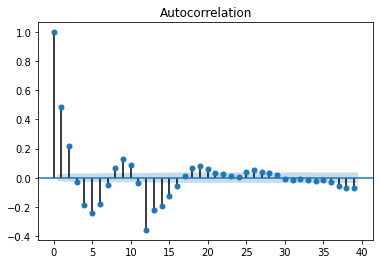

In [202]:
# See Auto-Co Relation Plot

acf =  plot_acf(new_df['Temperature'])

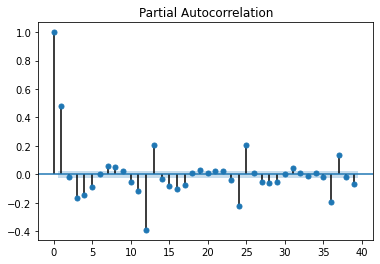

In [203]:
# See Partial Auto-Co Relation Plot
pacf = plot_pacf(new_df['Temperature'])

In [204]:
training_data = new_df[0:6000]
testing_data = new_df[6000:]
training_data.head(10)

,Temperature,Moving_avg
dt,,
1850-05-01,1.799,-0.4706
1850-06-01,-0.932,-0.3106
1850-07-01,-2.714,-0.6530
1850-08-01,-0.164,-0.3960
1850-09-01,0.714,-0.2594
1850-10-01,1.028,-0.4136
1850-11-01,0.024,-0.2224
1850-12-01,-0.779,0.1646
1851-01-01,0.462,0.2898


In [205]:
arima =  ARIMA(training_data['Temperature'],order=(2,0,3))
model = arima.fit()
predictions = model.forecast(steps=len(testing_data))[0]

In [206]:
np.sqrt(mean_squared_error(predictions,testing_data['Temperature']))

1.5120995880012544

In [207]:
p_values = range(4)
q_values = range(4)
d_values = range(3)
result= []
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            try:
                arima =  ARIMA(training_data['Temperature'],order=order)
                model = arima.fit()
                predictions = model.forecast(steps=len(testing_data))[0]
                error = np.sqrt(mean_squared_error(testing_data['Temperature'],predictions))
                print("MSA : {} Order : {}".format(error,order))
                result.append((error,order))
            except Exception as err:
                # print(err,"-->",order) 
                continue
                

MSA : 1.512955048091427 Order : (0, 0, 0)
MSA : 1.512791768766428 Order : (0, 0, 1)
MSA : 1.5130041759625412 Order : (0, 0, 2)
MSA : 1.5130849238371118 Order : (0, 0, 3)
MSA : 1.5376153217366517 Order : (0, 1, 0)
MSA : 1.5275626901521155 Order : (0, 1, 1)
MSA : 1.5127742838957066 Order : (0, 1, 2)
MSA : 1.512980654199169 Order : (0, 1, 3)
MSA : 935.4474927626451 Order : (0, 2, 0)
MSA : 1.5797037441868151 Order : (0, 2, 1)
MSA : 1.5129399506486823 Order : (1, 0, 0)
MSA : 1.512928259752068 Order : (1, 0, 1)
MSA : 1.513058660967933 Order : (1, 0, 2)
MSA : 1.513092346050686 Order : (1, 0, 3)
MSA : 1.5185985128466328 Order : (1, 1, 0)
MSA : 1.5129257973660062 Order : (1, 1, 1)
MSA : 1.512918228273255 Order : (1, 1, 2)
MSA : 1.513029636912746 Order : (1, 1, 3)
MSA : 299.9094537096309 Order : (1, 2, 0)
MSA : 1.5129219130234963 Order : (2, 0, 0)
MSA : 1.513087631404384 Order : (2, 0, 1)
MSA : 1.5133514268091204 Order : (2, 0, 2)
MSA : 1.5120995880012544 Order : (2, 0, 3)
MSA : 1.52304815482160

In [208]:
min(result)

(1.5120995880012544, (2, 0, 3))